# Demo notebook

This notebook demonstrates how to fit 1- and 2-variable linear models using `sklearn`'s `LinearRegression` class

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# 1-Variable regression

#### Generate simulated data

In [13]:
# true parameters
m_true = 0.5
b_true = 3

In [17]:
# function for generating data as "true line plus gaussian noise"
def generate_1D_data(m: float, b: float, npoints: int = 10, sigma: float = 0.1):
    x = np.random.random(size=npoints)
    y_perfect = x * m + b
    y = y_perfect + sigma * np.random.randn(npoints)
    return x, y

In [20]:
# generate the data
x, y = generate_1D_data(m_true, b_true)

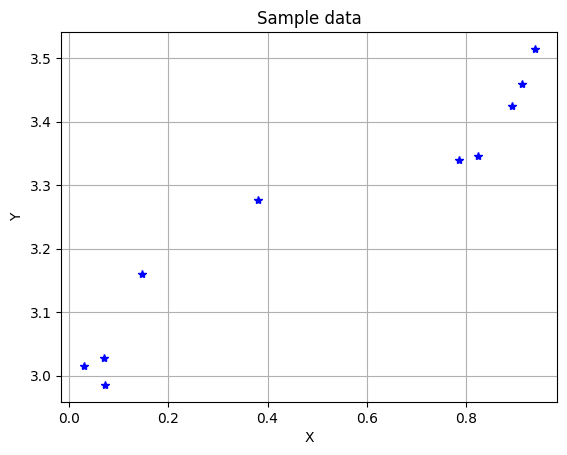

In [22]:
# visualize the data
plt.plot(x, y, '*b')
ax = plt.gca()
ax.set_title('Sample data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

#### Fit the data

In [23]:
# fit the linear regression model
model = LinearRegression()
model.fit(x.reshape(10,1),y)

LinearRegression()

In [24]:
# define a function for inspecting "best fit" parameters
def display_fit_params(fit_model):
    print(f"scaling coefficients: {model.coef_}")
    print(f"intercept: {model.intercept_}")


#### Visualize the fit

In [26]:
# display the fit parameters.  Note these are close to our "true" values of 0.5 and 3
display_fit_params(model)

scaling coefficients: [0.47173119]
intercept: 3.0160378349646564


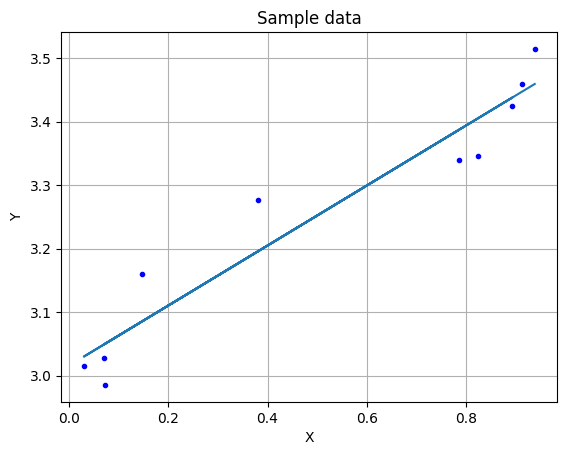

In [30]:
# visualize fit against the data
plt.plot(x, y, '.b')
plt.plot(x, model.coef_ * x + model.intercept_)
ax = plt.gca()
ax.set_title('Sample data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

# 2 variable regression

Here we'll fit something of the form:

$z = \alpha * x + \beta * y + \gamma$


#### Generate the data

In [100]:
# function for generating data as "true line plus gaussian noise"
def generate_2D_data(alpha: float, beta: float, gamma: float, npoints: int = 20, sigma: float = 0.1):
    x = np.random.random(size=npoints)
    y = np.random.random(size=npoints)
    z_perfect = x * alpha + y * beta + gamma
    z = z_perfect #+ sigma * np.random.randn(npoints)
    return x, y, z

In [101]:
alpha_true = 1.0
beta_true = 3.0
gamma_true = 8.0
npoints = 20

x, y, z = generate_2D_data(alpha_true, beta_true, gamma_true, npoints)

#### Plot the data

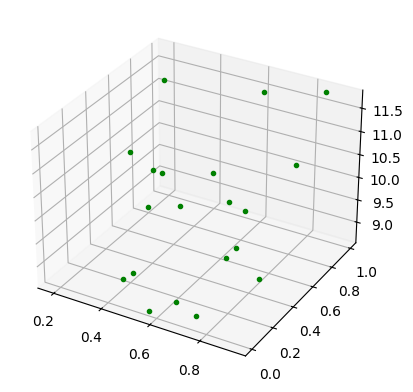

In [102]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x, y, z, '.g')

#### Fit the data

Note that the to use the `fit` method, we need a single array holding x and y as columns

In [107]:
x

array([0.61905894, 0.92489836, 0.75666449, 0.8643498 , 0.49528926,
       0.31891336, 0.43256771, 0.18600279, 0.40224743, 0.56350801,
       0.7853162 , 0.68036172, 0.87157522, 0.37039644, 0.6534989 ,
       0.75095773, 0.18963281, 0.56483874, 0.76395566, 0.35989375])

In [108]:
# X is just an array whose first column is x and second column is y
X = np.array([x, y]).reshape(2, npoints).T
X

array([[0.61905894, 0.96865133],
       [0.92489836, 0.19447745],
       [0.75666449, 0.45973557],
       [0.8643498 , 0.98396145],
       [0.49528926, 0.4527416 ],
       [0.31891336, 0.59164072],
       [0.43256771, 0.15648893],
       [0.18600279, 0.66212245],
       [0.40224743, 0.12702144],
       [0.56350801, 0.01130679],
       [0.7853162 , 0.30482914],
       [0.68036172, 0.49043678],
       [0.87157522, 0.6667785 ],
       [0.37039644, 0.4323165 ],
       [0.6534989 , 0.0608751 ],
       [0.75095773, 0.01655947],
       [0.18963281, 0.98928928],
       [0.56483874, 0.60193912],
       [0.76395566, 0.26233071],
       [0.35989375, 0.58267463]])

In [105]:
model2 = LinearRegression()
model2.fit(X, z)

LinearRegression()

#### Visualize the fit

In [106]:
display_fit_params(model2)

scaling coefficients: [ 0.18083482 -1.0437461 ]
intercept: 10.514487728387401


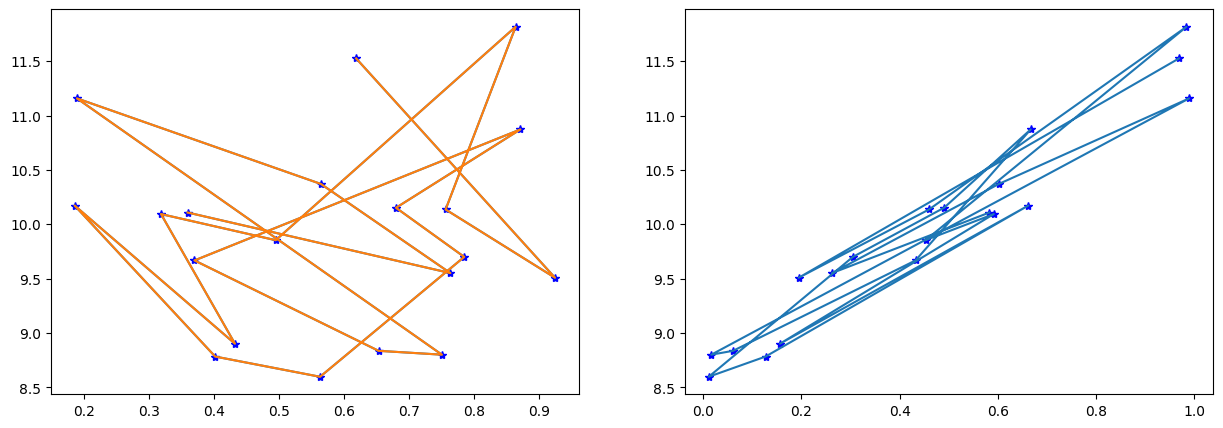

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
predictions = model2.predict(X)
ax[0].plot(x, z, '*b')
ax[0].plot(x, predictions)
ax[0].plot(x, model2.coef_[0] * x +   model2.coef_[1] * y + model2.intercept_)
ax[1].plot(y, z, '*b')
ax[1].plot(y, model2.coef_[0] * x +   model2.coef_[1] * y + model2.intercept_)

In [109]:
model2.predict(X)

array([11.52501293,  9.5083307 , 10.1358712 , 11.81623414,  9.85351407,
       10.09383552,  8.90203449, 10.17237013,  8.78331176,  8.59742837,
        9.69980361, 10.15167206, 10.87191074,  9.66734594,  8.83612419,
        8.80063614, 11.15750064, 10.37065612,  9.55094778, 10.10791763])

In [115]:
X * model2.coef{}

array([[0.61905894, 0.96865133],
       [0.92489836, 0.19447745],
       [0.75666449, 0.45973557],
       [0.8643498 , 0.98396145],
       [0.49528926, 0.4527416 ],
       [0.31891336, 0.59164072],
       [0.43256771, 0.15648893],
       [0.18600279, 0.66212245],
       [0.40224743, 0.12702144],
       [0.56350801, 0.01130679],
       [0.7853162 , 0.30482914],
       [0.68036172, 0.49043678],
       [0.87157522, 0.6667785 ],
       [0.37039644, 0.4323165 ],
       [0.6534989 , 0.0608751 ],
       [0.75095773, 0.01655947],
       [0.18963281, 0.98928928],
       [0.56483874, 0.60193912],
       [0.76395566, 0.26233071],
       [0.35989375, 0.58267463]])